# Stock Prediction based on historical data using Simple Linear Regression of the following top 5 growing Tech Companies of 2019: 

# 1) Nvidia 2) Rapid7 3) Splunk 4) Paypal 5)Synposys

In [425]:
#Import Dependencies
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import datetime as dt1
from datetime import datetime as dt

# Splunk Analysis

In [426]:
#Using 5 years of historical data on closing prices from 2014-2019
splunk=pd.read_csv('CSV Files/SPLK.csv')
splunk.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,47.320000,47.919998,46.209999,47.240002,47.240002,1280200
1,2014-07-14,47.570000,49.250000,47.500000,48.029999,48.029999,1602200
2,2014-07-15,47.910000,48.279999,46.070000,46.380001,46.380001,2163500
3,2014-07-16,47.290001,47.430000,46.220001,46.540001,46.540001,1270400
4,2014-07-17,46.000000,46.869999,45.529999,45.779999,45.779999,1798300


In [427]:
splunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [428]:
#define low and high stock prices from 2014-2019
splunk.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,75.490207,76.728680,74.193601,75.489356,75.489356,1.915372e+06
std,26.064798,26.432939,25.646934,26.056104,26.056104,1.437501e+06
min,31.059999,31.870001,29.850000,30.860001,30.860001,4.992000e+05
25%,57.742502,58.804999,56.799999,57.752499,57.752499,1.210650e+06
50%,63.815000,64.604999,62.555001,63.730000,63.730000,1.597950e+06
75%,97.724999,99.855002,95.152498,97.597499,97.597499,2.149350e+06
max,143.000000,143.699997,138.000000,139.009995,139.009995,2.022960e+07


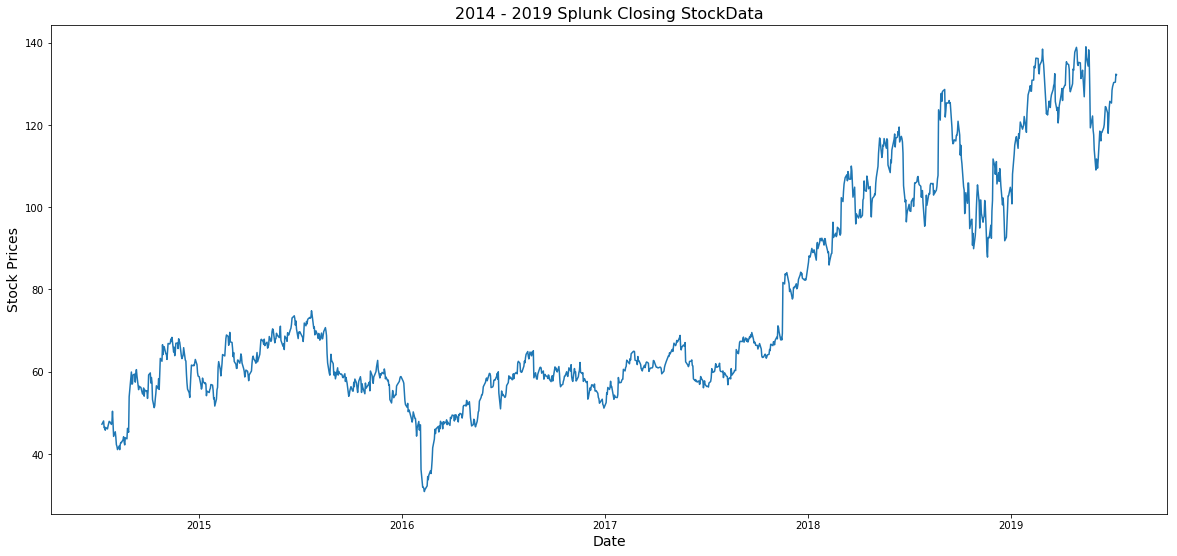

In [476]:
#setting index as date
splunk['Date'] = pd.to_datetime(splunk.Date,format='%Y-%m-%d')   
splunk.index = splunk['Date']

#plot data
plt.figure(figsize=(20,9))
plt.title('2014 - 2019 Splunk Closing StockData', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel("Stock Prices", fontsize=14)
plt.plot(spunk['Close'])

In [430]:
#method of plotting data using index for LR 
splunk = pd.DataFrame(splunk, columns=['Date','Close'])

splunk = splunk.reset_index()
splunk.head()

,index,Date,Close
0,0,2014-07-11,47.240002
1,1,2014-07-14,48.029999
2,2,2014-07-15,46.380001
3,3,2014-07-16,46.540001
4,4,2014-07-17,45.779999


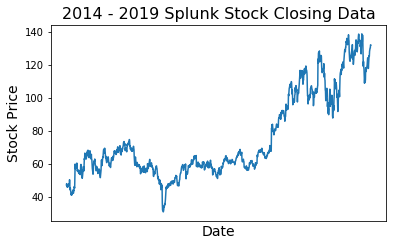

In [431]:
#plotting data 
import matplotlib.dates as mdates
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

#Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(splunk['Date'], splunk['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.figure(1, figsize=(16,10))
plt.title('2014 - 2019 Splunk Stock Closing Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label

plt.ylabel('Stock Price', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [432]:
# Import dependency for testing and training data  data set
from sklearn.model_selection import train_test_split

In [433]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(splunk.index).reshape(-1, 1)
y_train = splunk['Close']

In [434]:
# Create a Sklearn Linear Regression model
model = LinearRegression()
# Train the model using the training data/ fit the model to the data
model.fit(X_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [435]:
#View the coefficients and intercept of the line
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.05802967]
y-axis intercept:  39.01770679554646


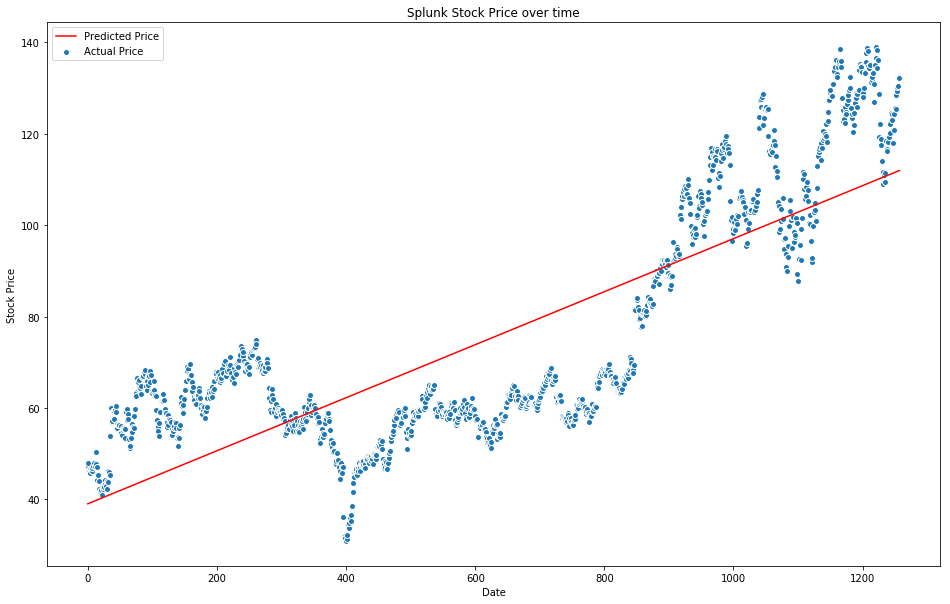

In [436]:
#Show the Model fit by plotting the predicted values against the orginial data
plt.figure(1, figsize=(16,10))
plt.title('Splunk Stock Price over time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Synopsys Analysis

In [437]:
#Using 5 years of historical data on closing prices from 2014-2019
synopsys=pd.read_csv('CSV Files/SNPS.csv')
synopsys.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,38.660000,38.669998,38.259998,38.660000,38.660000,675900
1,2014-07-14,38.860001,39.450001,38.700001,39.160000,39.160000,802400
2,2014-07-15,39.259998,39.439999,39.060001,39.369999,39.369999,681300
3,2014-07-16,39.459999,39.549999,38.790001,39.209999,39.209999,911600
4,2014-07-17,39.000000,39.299999,38.919998,39.070000,39.070000,585900


In [438]:
##define low and high stock prices from 2014-2019
synopsys.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,68.691892,69.277727,68.119690,68.735437,68.735437,9.430308e+05
std,23.397412,23.620123,23.174455,23.414023,23.414023,9.627387e+05
min,36.880001,37.549999,36.619999,37.279999,37.279999,2.173000e+05
25%,47.642500,48.095000,47.342500,47.779999,47.779999,6.202750e+05
50%,61.049999,61.414999,60.589998,60.910000,60.910000,8.146500e+05
75%,87.570002,88.482498,86.757502,87.645001,87.645001,1.116300e+06
max,136.350006,137.880005,136.110001,137.570007,137.570007,3.029460e+07


In [439]:
synopsys = pd.DataFrame(synopsys, columns=['Date','Close'])
synopsys = synopsys.reset_index()
synopsys.head()

,index,Date,Close
0,0,2014-07-11,38.660000
1,1,2014-07-14,39.160000
2,2,2014-07-15,39.369999
3,3,2014-07-16,39.209999
4,4,2014-07-17,39.070000


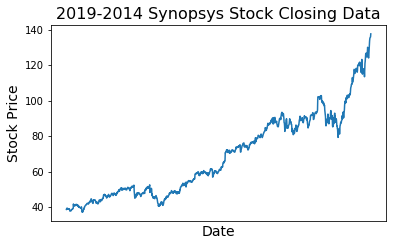

In [441]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(synopsys['Date'], synopsys['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('2019-2014 Synopsys Stock Closing Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Price', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.figure(1, figsize=(16,10))
plt.show()

In [442]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [443]:

# Reshape index column to 2D array for .fit() method
X_train = np.array(synopsys.index).reshape(-1, 1)
y_train = synopsys['Close']

In [444]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [445]:
#View the coefficients and intercept of the line
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.06128041]
y-axis intercept:  30.220701651890195


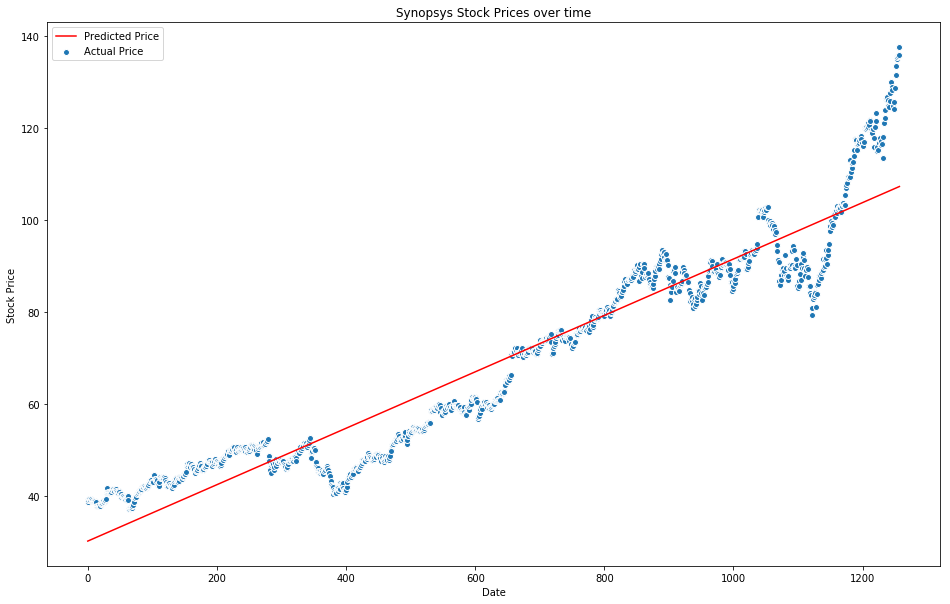

In [446]:
plt.figure(1, figsize=(16,10))
plt.title('Synopsys Stock Prices over time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Paypal Analysis

In [447]:
paypal=pd.read_csv('CSV Files/PYPL.csv')
paypal.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600
1,2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000
2,2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700
3,2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100
4,2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800


In [448]:
paypal.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1.011000e+03
mean,61.761583,62.455396,61.027792,61.780663,61.780663,8.511183e+06
std,24.882398,25.155718,24.642028,24.935328,24.935328,4.811326e+06
min,30.820000,31.280001,30.000000,30.629999,30.629999,2.133400e+06
25%,38.935000,39.390001,38.440000,38.950001,38.950001,5.754700e+06
50%,54.439999,55.099998,53.650002,54.389999,54.389999,7.380700e+06
75%,83.225002,84.520001,82.005001,83.269997,83.269997,9.665000e+06
max,119.110001,120.199997,118.779999,119.639999,119.639999,5.228650e+07


In [449]:
paypal = pd.DataFrame(paypal, columns=['Date','Close'])

paypal = paypal.reset_index()
paypal.head()

,index,Date,Close
0,0,2015-07-06,36.709999
1,1,2015-07-07,36.619999
2,2,2015-07-08,34.700001
3,3,2015-07-09,34.500000
4,4,2015-07-10,34.689999


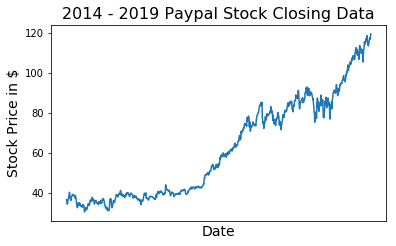

In [450]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(paypal['Date'], paypal['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('2014 - 2019 Paypal Stock Closing Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.figure(1, figsize=(16,10))
plt.show()

In [451]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [452]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(paypal.index).reshape(-1, 1)
y_train = paypal['Close']

In [453]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [454]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.0813716]
y-axis intercept:  20.688002598988213


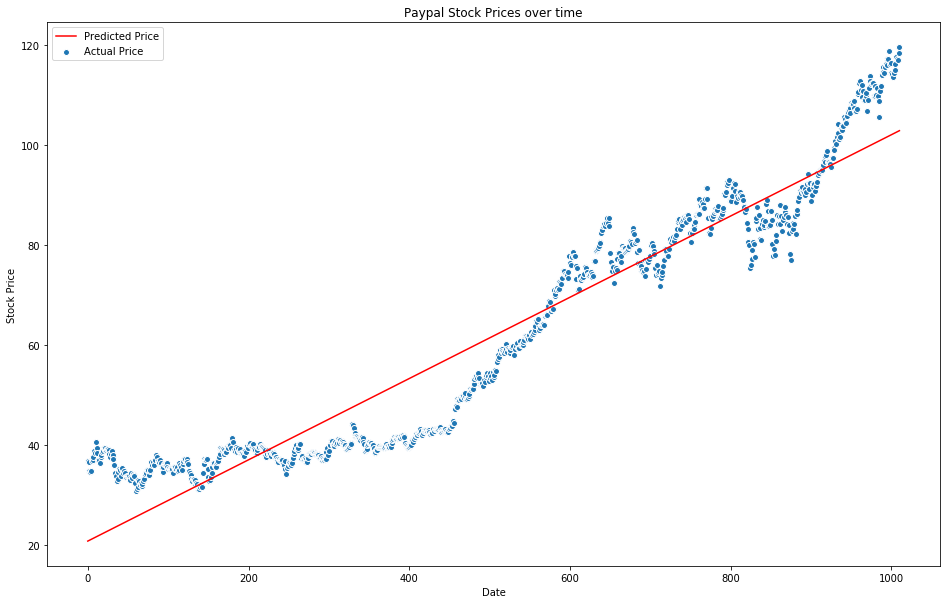

In [455]:
plt.figure(1, figsize=(16,10))
plt.title('Paypal Stock Prices over time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Rapid7 Analysis

In [456]:
rapid=pd.read_csv("CSV files/RPD.csv")
rapid.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-17,26.750000,27.450001,24.020000,25.280001,25.280001,10609300
1,2015-07-20,26.000000,26.190001,22.709999,23.100000,23.100000,1660900
2,2015-07-21,22.799999,23.100000,22.090000,22.940001,22.940001,856200
3,2015-07-22,22.670000,24.350000,22.570000,23.950001,23.950001,810600
4,2015-07-23,24.700001,24.850000,23.920000,24.100000,24.100000,459300


In [457]:
rapid.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03
mean,23.851906,24.365489,23.325865,23.872335,23.872335,3.672044e+05
std,11.929826,12.154838,11.703647,11.968498,11.968498,4.660865e+05
min,9.620000,10.170000,9.050000,9.460000,9.460000,4.280000e+04
25%,15.025000,15.337500,14.750000,15.060000,15.060000,1.537500e+05
50%,18.775001,19.090000,18.350001,18.729999,18.729999,2.595500e+05
75%,30.695001,31.542499,29.935001,30.804999,30.804999,4.538500e+05
max,60.700001,62.169998,60.674999,62.070000,62.070000,1.060930e+07


In [458]:
rapid = pd.DataFrame(rapid, columns=['Date','Close'])
rapid= rapid.reset_index()
rapid.head()

,index,Date,Close
0,0,2015-07-17,25.280001
1,1,2015-07-20,23.100000
2,2,2015-07-21,22.940001
3,3,2015-07-22,23.950001
4,4,2015-07-23,24.100000


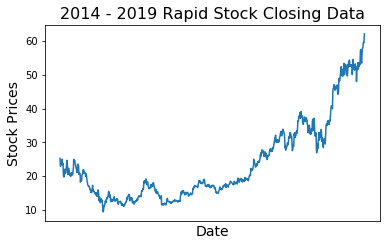

In [459]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(rapid['Date'], rapid['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('2014 - 2019 Rapid Stock Closing Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Prices', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.figure(1, figsize=(16,10))
plt.show()

In [460]:
from sklearn.model_selection import train_test_split

In [461]:

# Reshape index column to 2D array for .fit() method
X_train = np.array(rapid.index).reshape(-1, 1)
y_train = rapid['Close']

In [462]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [463]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.03283319]
y-axis intercept:  7.439322837276588


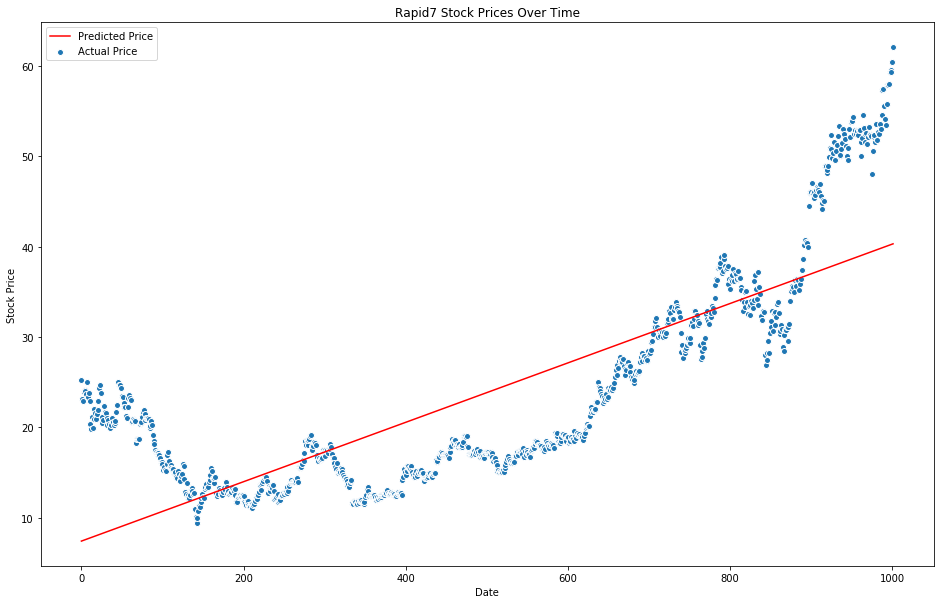

In [464]:
plt.figure(1, figsize=(16,10))
plt.title('Rapid7 Stock Prices Over Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Nvidia Analysis

In [465]:
nvidia=pd.read_csv('CSV Files/NVDA.csv')
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,19.030001,19.110001,18.959999,19.049999,18.239098,4779700
1,2014-07-14,19.129999,19.340000,19.059999,19.290001,18.468878,6815900
2,2014-07-15,19.320000,19.420000,19.190001,19.370001,18.545475,9886000
3,2014-07-16,19.450001,19.600000,19.240000,19.350000,18.526329,7993200
4,2014-07-17,19.129999,19.500000,19.129999,19.299999,18.478455,8120800


In [466]:
nvidia.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,110.383752,111.990866,108.581852,110.339992,109.632220,1.199031e+07
std,84.806529,86.001636,83.376074,84.692143,84.591351,7.700362e+06
min,16.930000,17.299999,16.770000,16.790001,16.146412,1.141100e+06
25%,25.275000,25.935001,24.835000,25.445000,24.980770,7.306875e+06
50%,99.915001,101.275002,98.440002,99.855000,99.100518,9.966900e+06
75%,179.207501,180.812500,175.882496,179.247501,178.267120,1.451225e+07
max,289.320007,292.760010,285.579987,289.359985,288.443909,9.232320e+07


In [467]:
nvidia = pd.DataFrame(nvidia, columns=['Date','Close'])
nvidia= nvidia.reset_index()
nvidia.head()

,index,Date,Close
0,0,2014-07-11,19.049999
1,1,2014-07-14,19.290001
2,2,2014-07-15,19.370001
3,3,2014-07-16,19.350000
4,4,2014-07-17,19.299999


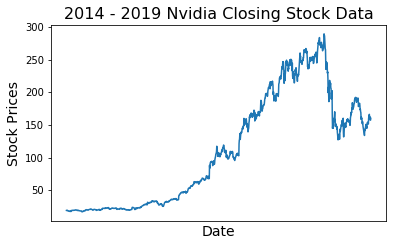

In [468]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(nvidia['Date'], nvidia['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('2014 - 2019 Nvidia Closing Stock Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Prices', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.figure(1, figsize=(16,10))
plt.show()

In [469]:
from sklearn.model_selection import train_test_split

In [470]:

# Reshape index column to 2D array for .fit() method
X_train = np.array(nvidia.index).reshape(-1, 1)
y_train = nvidia['Close']

In [471]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [472]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [0.20282202]
y-axis intercept:  -17.133646401737025


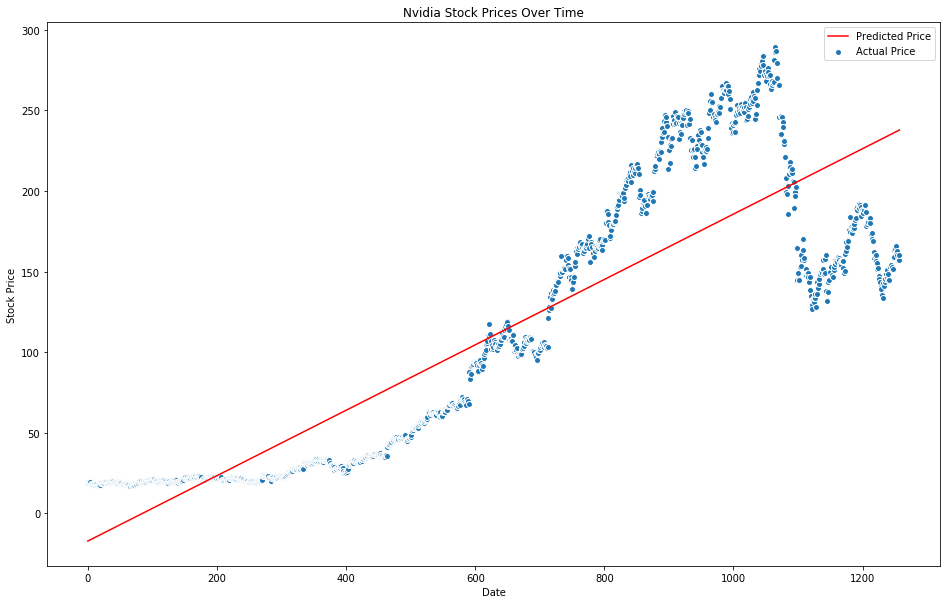

In [473]:
plt.figure(1, figsize=(16,10))
plt.title('Nvidia Stock Prices Over Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()